In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
"""  Lade die CSV_Datei, die ich im Dokument "Extraktion" erstellt habe """
df_pv = pd.read_csv('pisa_it_18.csv')


## Hypothesentest

Ich möchte prüfen, ob der frühere Zugang zu digitalen Geräten die schulische Leistung verschlechtert. Dementsprechend erstelle ich *Null-* und *Alternativhypotese*. 
Als Stichproben nehme ich die Schüler, die ihren Zugang zu IKT bis zum 6. Lebensjahr hatten (Gruppe 1) und vergleiche sie mit den anderen (Gruppe 2).
##### Nullhypothese: 
Mittelwert der PVs von Kindern, die ihren ersten Zugang zu IKT bis zum 6. Lebensjahr hatten ist kleiner als der Mittelwert der PVs von Kindern, die ihren ersten Zugang zu IKT später hatten.

<script src="https://i.upmath.me/latex.js"></script>
<p>$$  H_0 = Mittelwert_1  <  Mittelwert_2 $$</p>

##### Alternativhypothese: 
Mittelwert der PVs von Kindern, die ihren ersten Zugang zu IKT bis zum 6. Lebensjahr hatten ist gleich oder drößer als der Mittelwert der PVs von Kindern, die ihren ersten Zugang zu IKT später hatten.

<script src="https://i.upmath.me/latex.js"></script>
<p>$$  H_0 = Mittelwert_1  ≥  Mittelwert_2 $$</p>


Zunächst errechne ich die Mittlere Kompetenz der Schüler. Ich will nur die Schüler berücksichtigen, die Angaben zu der Frage 'How old were you when you first used a digital device?' (Spalte IC002Q01HA) gemacht haben.

In [35]:
mask_dig =  df_pv['IC002Q01HA'].isnull() #sortiere die fehlende Daten aus

df_dig = df_pv[~mask_dig] # nehme nur die Zeilen, wo in der Spalte IC002Q01HA Daten sind

In [36]:
df_dig

,Unnamed: 0,CNT,CNTSTUID,ST004D01T,ST005Q01TA,ST006Q01TA,ST006Q02TA,ST006Q03TA,ST006Q04TA,ST007Q01TA,...,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE
0,0,ALB,800001.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,...,390.471,363.896,394.451,405.479,309.142,356.123,387.410,421.957,375.945,383.357
1,1,ALB,800002.0,1.0,3.0,2.0,2.0,2.0,2.0,3.0,...,336.318,331.444,311.961,374.377,300.209,343.909,338.622,362.539,299.426,235.952
2,2,ALB,800003.0,2.0,3.0,2.0,1.0,1.0,2.0,3.0,...,334.669,326.045,331.331,364.414,285.723,383.883,310.549,308.666,360.635,326.120
4,4,ALB,800005.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,...,445.335,466.726,452.740,401.497,481.526,425.924,459.286,465.062,455.885,451.672
5,5,ALB,800006.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,...,362.217,414.457,376.691,388.092,379.965,353.593,370.285,312.915,414.184,341.561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611997,611997,QRT,98329087.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,533.937,606.432,537.353,566.959,562.266,611.269,589.328,585.881,586.403,586.485
611999,611999,QRT,98329092.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,...,452.303,451.902,449.829,446.977,467.815,443.497,448.151,468.910,451.039,457.704
612000,612000,QRT,98329094.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,...,661.860,669.624,617.892,659.689,630.667,656.111,715.919,615.311,621.503,632.207
612001,612001,QRT,98329104.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,...,344.833,444.303,392.898,414.349,432.541,460.006,432.570,407.413,450.343,370.131


Um die Analyse etwas sauberer zu machen, vergleiche ich die Kinder aus den Familien mit dem möglichst gleichem Wohlstand. Dafür nehme ich Index 'WEALTH', der bezieht sich auf den Besitz von Wohlstandsgütern in der Familie (Skalenhandbuch PISA 2015, S.143). Dieser Index hat einen Mittelwert M = 0 und eine Standardabweichung = 1, d.h. ist genormt auf die Angaben der OECD Länder.

In [37]:
df_dig['WEALTH'].describe()

count    349260.000000
mean         -0.350660
std           1.112907
min          -7.546500
25%          -0.974400
50%          -0.293900
75%           0.335500
max           4.753400
Name: WEALTH, dtype: float64

In [38]:
""" Schüler mit WEALTH Index von 0 bis 1 """
df_wealth = df_dig.loc[(df_dig['WEALTH'] >= 0) &  (df_dig['WEALTH'] <= 1)]
df_wealth

,Unnamed: 0,CNT,CNTSTUID,ST004D01T,ST005Q01TA,ST006Q01TA,ST006Q02TA,ST006Q03TA,ST006Q04TA,ST007Q01TA,...,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE
7,7,ALB,800008.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,...,507.764,517.542,475.533,443.708,496.192,486.280,507.245,486.373,519.417,429.397
14,14,ALB,800017.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,...,465.640,529.742,431.925,453.852,434.518,496.481,470.893,466.921,495.011,429.770
21,21,ALB,800024.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,...,476.696,476.413,486.975,528.650,512.304,561.742,608.192,603.496,515.856,507.707
32,32,ALB,800038.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,...,441.458,373.165,448.003,377.035,452.299,381.176,383.137,403.548,363.930,391.897
35,35,ALB,800041.0,1.0,3.0,1.0,2.0,2.0,NaN,1.0,...,456.690,455.383,462.399,446.153,483.460,434.739,478.750,492.937,411.856,448.569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611983,611983,QRT,98329023.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,...,438.498,505.772,454.281,508.249,447.066,403.107,528.576,509.855,490.651,533.711
611992,611992,QRT,98329060.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,...,431.638,465.074,432.844,440.219,423.328,415.316,400.791,359.967,338.282,451.638
611997,611997,QRT,98329087.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,533.937,606.432,537.353,566.959,562.266,611.269,589.328,585.881,586.403,586.485
612000,612000,QRT,98329094.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,...,661.860,669.624,617.892,659.689,630.667,656.111,715.919,615.311,621.503,632.207


Ich rechne die Mittelwerte von PVs für jeden Schüler, um die vergleichen zu können.

In [39]:
df_wealth['Mean'] = df_wealth.loc[:, 'PV1MATH':'PV10SCIE'].mean(axis=1)
df_wealth.head(3)

/opt/miniconda3/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,CNT,CNTSTUID,ST004D01T,ST005Q01TA,ST006Q01TA,ST006Q02TA,ST006Q03TA,ST006Q04TA,ST007Q01TA,...,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE,Mean
7,7,ALB,800008.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,...,517.542,475.533,443.708,496.192,486.280,507.245,486.373,519.417,429.397,485.127100
14,14,ALB,800017.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,...,529.742,431.925,453.852,434.518,496.481,470.893,466.921,495.011,429.770,473.020733
21,21,ALB,800024.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,...,476.413,486.975,528.650,512.304,561.742,608.192,603.496,515.856,507.707,542.695600


Zusammenfassen von Altersgruppen aus jedem Land:

In [40]:
df_first_device = df_wealth.pivot_table(index = ['CNT'], columns = ['IC002Q01HA'], values = ['CNTSTUID'], aggfunc='count').droplevel(level = 0, axis=1)

In [41]:
df_first_device['bis_6'] = df_first_device[[1,2]].sum(axis=1)# ich fasse die Altersgruppen bis 3.Jahr und 4-6 Jahre zusammen
df_first_device.head(5)

IC002Q01HA,1.0,2.0,3.0,4.0,5.0,6.0,bis_6
CNT,,,,,,,
ALB,80.0,191.0,150.0,80.0,32.0,6.0,271.0
AUS,392.0,1568.0,2201.0,1279.0,249.0,30.0,1960.0
BEL,193.0,822.0,1309.0,1003.0,142.0,10.0,1015.0
BGR,211.0,519.0,384.0,113.0,43.0,29.0,730.0
BRA,84.0,256.0,209.0,95.0,13.0,3.0,340.0


In [42]:
"""Sortiere das Land/die Länder mit großer Anzahl von Befragten aus"""
zu_gross= df_first_device['bis_6'].sort_values(ascending=False)
zu_gross.head(5)

CNT
ESP    5754.0
AUS    1960.0
FIN    1670.0
GBR    1483.0
DNK    1476.0
Name: bis_6, dtype: float64

In [43]:
"""Damit die Graphik veranschaulicher ist, schließe ich Spanien aus """
df_first_device_small = df_first_device.loc[df_first_device.index != 'ESP']

 Graphische Darstellung

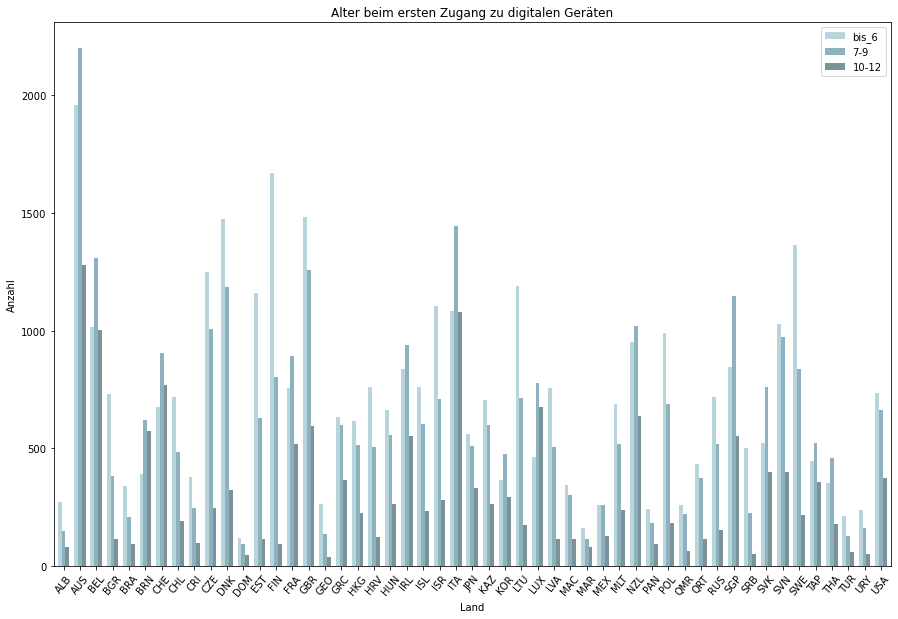

In [45]:
data = {'bis_6': df_first_device_small['bis_6'],\
       '7-9' : df_first_device_small[3],\
          '10-12': df_first_device_small[4]}
colors1 = ['#513e5c','#eceac7', '#7b9bb3']
colors2 = ['#89b9c5','#417d95', '#234a56']

df_data = pd.DataFrame(data)


df_data.plot(kind='bar', color = colors2, alpha = 0.6, width = 0.7, figsize = (15,10) )
plt.gca().set_xticklabels(df_data.index, rotation=50)
plt.ylabel('Anzahl')
plt.xlabel('Land')
plt.title('Alter beim ersten Zugang zu digitalen Geräten')

plt.show()


Erläuterung der Spalten:

**IC002Q01HA** "How old were you when you first used a digital device?"


Die Antworten (aus dem Codebook):

+ `1`___  3 years old or younger  
+ `2`___	 4-6 years old 
+ `3`___	 7-9 years old  
+ `4`___	 10-12 years old 
+ `5`___ 	13 years old or older 
+ `6`___ 	"I have never used a digital device until today / accessed the Internet." 



Für eine annähernd gleich große Stichprobe wähle ich aus der Grafik ein Land, wo die Altersgruppen etwa gleich groß ausfallen. Zum Beispiel Belgium (BEL)

In [46]:
""" Ich sortiere die Schüler aus, die
Zugang zu digitalen Geräten bis zum 6. Lebensjahr hatten, also die Antworten sind 1.0 oder 2.0 """

df_group_1 = df_wealth.loc[(df_wealth['IC002Q01HA'] <= 2) &  (df_wealth['CNT'] == 'BEL')]


In [47]:
""" Schüler, die Zugang zu digitalen Geräten ab 6. Lebensjahr
oder noch gar nicht hatten, also die Antworten sind von 3.0 bis 6.0 """

df_group_2 = df_wealth.loc[(df_wealth['IC002Q01HA'] == 4) &  (df_wealth['CNT'] == 'BEL')]
df_group_2

,Unnamed: 0,CNT,CNTSTUID,ST004D01T,ST005Q01TA,ST006Q01TA,ST006Q02TA,ST006Q03TA,ST006Q04TA,ST007Q01TA,...,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE,Mean
46238,46238,BEL,5600003.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,...,562.487,524.375,487.798,542.137,560.696,514.927,536.473,597.253,544.394,524.589433
46243,46243,BEL,5600008.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,556.354,579.438,519.513,518.946,586.352,559.259,562.642,549.798,539.262,574.525300
46248,46248,BEL,5600013.0,2.0,2.0,NaN,1.0,NaN,NaN,2.0,...,411.931,369.532,405.627,361.564,347.953,394.539,359.930,325.514,398.522,392.372367
46249,46249,BEL,5600014.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,503.318,588.333,495.869,523.322,528.621,497.528,568.132,516.480,547.338,546.565433
46270,46270,BEL,5600043.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,...,422.887,414.244,342.845,394.007,440.655,521.603,456.138,475.374,419.711,448.782500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54675,54675,BEL,5609779.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,564.427,509.113,464.956,488.296,533.006,516.923,525.022,516.390,496.958,499.307333
54689,54689,BEL,5609794.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,...,414.081,383.027,448.387,465.430,416.933,461.747,462.854,420.050,417.392,441.794867
54691,54691,BEL,5609798.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,468.886,417.332,396.408,445.386,379.466,447.709,377.272,445.850,431.416,432.207700
54693,54693,BEL,5609800.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,569.917,503.511,503.081,492.384,481.400,522.141,474.986,539.310,502.309,504.273600


In [48]:
print('Anzahl Gruppe 1: ' + str(len(df_group_1)) + ', Anzahl Gruppe 2: ' + str(len(df_group_2)))

Anzahl Gruppe 1: 1015, Anzahl Gruppe 2: 1003



Da die Varianz der Population nicht bekannt ist, berechne ich die sogenannte **gepoolte Varianz**:

<img align="center" src="https://i.upmath.me/svg/%20s_p%5E2%20%3D%20%7B(n_1%20-1)s_1%5E2%20%2B%20(n_2%20-1)s_2%5E2%5Cover%20n_1%2Bn_2-2%7D%20" alt=" s_p^2 = {(n_1 -1)s_1^2 + (n_2 -1)s_2^2\over n_1+n_2-2} " />

Dafür brauche ich **Mittelwert**, **Standartabweichung**, **Stichprobengröße** und **Varianz** der beiden Stichproben.

In [49]:
""" Bestimmung der Größe der Stichprobe 1 und der Stichprobe 2 """
n1 = len(df_group_1)
n2 = len(df_group_2)
print( 'Größe der Stichprobe 1 = ' + str(n1) + ', Größe der Stichprobe 2 = ' + str(n2))

Größe der Stichprobe 1 = 1015, Größe der Stichprobe 2 = 1003


In [56]:
""" Berechnung vom Mittelwert der beiden Stichproben """

mean_1 = df_group_1['Mean'].mean(axis=0)
mean_2 = df_group_2['Mean'].mean(axis=0)
print ('Der Mittelwert der Stichprobe 1 = ' + str(mean_1) + ', der Mittelwert der Stichprobe 2 = ' + str(mean_2))

Der Mittelwert der Stichprobe 1 = 534.2790722824303, der Mittelwert der Stichprobe 2 = 507.25210471917575


In [57]:
""" Berechnung von einfacher Varianz für beiden Stichproben """
s1 = df_group_1['Mean'].var(axis=0)
s2 = df_group_2['Mean'].var(axis=0)


In [58]:
print( 'Die Größe der Stichprobe 1 = ' + str(n1) + ', die Größe der Stichprobe 2 = ' + str(n2) \
      + '\nDer Mittelwert der Stichprobe 1 = ' + str(mean_1)+ ', der Mittelwert der Stichprobe 2 = ' + str(mean_2) \
      + '\nDie Varianz der Stichprobe 1 = ' + str(s1) + ', die Varianz der Stichprobe 2 =  ' + str(s2))

Die Größe der Stichprobe 1 = 1015, die Größe der Stichprobe 2 = 1003
Der Mittelwert der Stichprobe 1 = 534.2790722824303, der Mittelwert der Stichprobe 2 = 507.25210471917575
Die Varianz der Stichprobe 1 = 7435.2619535495205, die Varianz der Stichprobe 2 =  6283.18516505911


Rechnen der gepoolten Varianz


<img align="center" src="https://i.upmath.me/svg/%20s_p%5E2%20%3D%20%7B(n_1%20-%201)s_1%5E2%20%2B%20(n_2%20-%201)s_2%5E2%5Cover%20n_1%20%2B%20n_2%20-%202%7D%0A" alt=" s_p^2 = {(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2\over n_1 + n_2 - 2}
" />

<img align="center" src="https://i.upmath.me/svg/%20s_p%5E2%20%3D%20%7B(1015%20-1)*7435.2619535495205%20%2B%20(1003%20-1)*6283.18516505911%5Cover%201015%2B1003-2%7D%20" alt=" s_p^2 = {(1015 -1)*7435.2619535495205 + (1003 -1)*6283.18516505911\over 1015+1003-2} " />



In [59]:
s_pool = ((n1-1)*s1 + (n2-1)*s2)/(n1+n2-1)
s_pool

6859.249953539138

Gepoolte Standardfehler:


<img src="https://i.upmath.me/svg/%20%5Csqrt%7B%7Bs_p%5E2%20%5Cover%20n_1%7D%20%2B%20%7Bs_p%5E2%20%5Cover%20n_2%7D%7D%20" alt=" \sqrt{{s_p^2 \over n_1} + {s_p^2 \over n_2}} " />

<img src="https://i.upmath.me/svg/%20%20%5Csqrt%7B%7B6859.249953539138%20%5Cover%201015%7D%20%2B%20%7B6859.249953539138%20%5Cover%201003%7D%7D%20%0A" alt="  \sqrt{{6859.249953539138 \over 1015} + {6859.249953539138 \over 1003}} 
" />

In [60]:
std_pool = ((s_pool/n1)+(s_pool/n2))**0.5
print('Gepoolte Standardfehler = ' + str(std_pool))

Gepoolte Standardfehler = 3.6873588759309905


Berechnen von T-Wert:
<img src="https://i.upmath.me/svg/%0AT%20%3D%20%7B(%5Cbar%7Bx%7D%20-%20%5Cbar%7By%7D)%20%5Cover%20%5Csqrt%7B%7Bs_p%5E2%20%5Cover%20n_1%7D%20%2B%20%7Bs_p%5E2%20%5Cover%20n_2%7D%7D%7D%0A" alt="
T = {(\bar{x} - \bar{y}) \over \sqrt{{s_p^2 \over n_1} + {s_p^2 \over n_2}}}
" />


In [61]:
T= (mean_1-mean_2)/std_pool
print('Der T-Wert ist gleich ' + str(T)) 

Der T-Wert ist gleich 7.329627647493562


In [62]:
fg = n1+n2-2 # Berechnung der Freiheitsgrade
print('Anzahl der Freiheitsgrade: ' + str(fg))

Anzahl der Freiheitsgrade: 2016


Berechnen von p-Wert erfolgt über: https://www.socscistatistics.com/pvalues/tdistribution.aspx

Ist p-Wert kleiner als das Signifikanzniveau, ist die Nullhypothese abzulehnen. Unser **p-Wert** ist kleiner als *0.00001*, als jeder Wert von $\alpha$.

Das Ergebniss ist somit extrem signifikant. Die **Nullhypotese**, dass die Kinder mit frühem Zugang zu den digitalen Geräten schlechtre schulische Leistung, als die andere Kinder haben, **ist abzulehnen**.

Visuelle Darstellung:

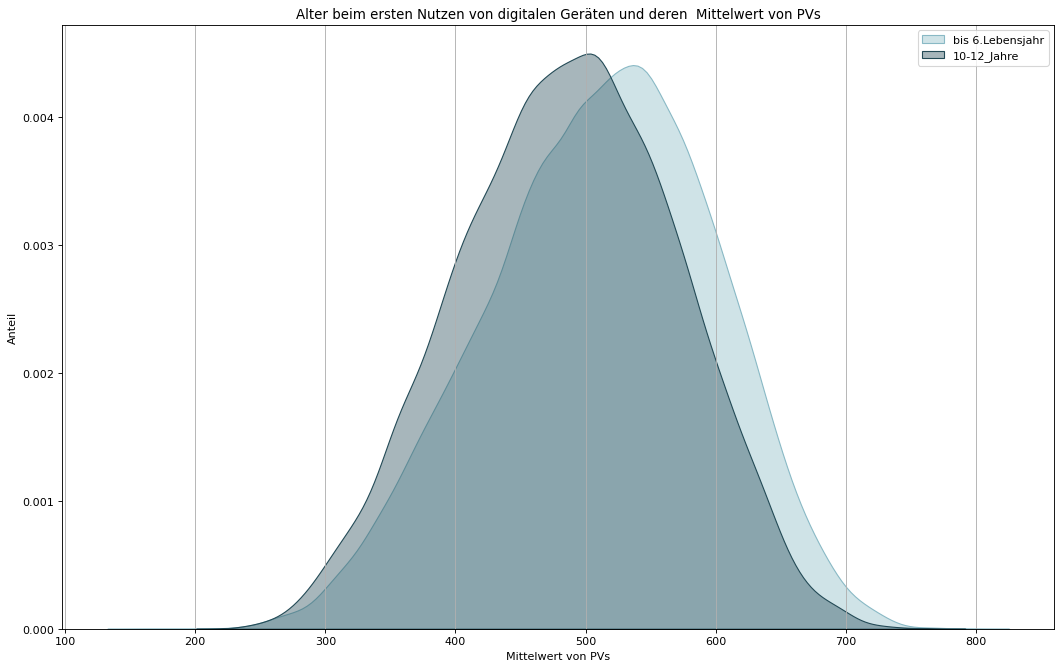

In [66]:
plt.figure(figsize=(16,10), dpi= 80)               
sns.kdeplot(df_wealth.loc[df_wealth['IC002Q01HA'] <= 2, "Mean"], shade=True, color="#89b9c5", label='bis 6.Lebensjahr', alpha=.4)
sns.kdeplot(df_wealth.loc[df_wealth['IC002Q01HA'] == 4, "Mean"], shade=True, color="#234a56", label='10-12_Jahre', alpha=.4)
plt.grid(axis='x')
plt.title('Alter beim ersten Nutzen von digitalen Geräten und deren  Mittelwert von PVs')
plt.ylabel('Anteil')
plt.xlabel('Mittelwert von PVs')
plt.legend()
plt.show()